<a href="https://colab.research.google.com/github/gaeunkim0721/CNN-Daisy-Dandelion-2021/blob/main/4_pretrained_daisy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%matplotlib inline

In [4]:
!ls -l

total 8
drwx------ 5 root root 4096 Jan 25 06:32 drive
drwxr-xr-x 1 root root 4096 Jan 20 17:27 sample_data


In [5]:
!cp ./drive/MyDrive/Data/Flowers.zip .

In [6]:
!unzip Flowers.zip


Archive:  Flowers.zip
  inflating: Flowers/README.dataset.txt  
  inflating: Flowers/README.roboflow.txt  
   creating: Flowers/test_data/
  inflating: Flowers/test_data/daisy.10466290366_cc72e33532_jpg.rf.6ddc91cd5d4a6a683e567ccb37e5a089.jpg  
  inflating: Flowers/test_data/daisy.10466558316_a7198b87e2_jpg.rf.7acf642b94dc98daa49482a12994ac4c.jpg  
  inflating: Flowers/test_data/daisy.12193032636_b50ae7db35_n_jpg.rf.e6c4eeb71c56e793a0d85f6d979dbe20.jpg  
  inflating: Flowers/test_data/daisy.1342002397_9503c97b49_jpg.rf.8fe6bdd23186b70f089bb0c5b89d314e.jpg  
  inflating: Flowers/test_data/daisy.1354396826_2868631432_m_jpg.rf.409eee37613d16dbc71365cb5615327e.jpg  
  inflating: Flowers/test_data/daisy.1374193928_a52320eafa_jpg.rf.e398f632151f3ccc5729bc89527d7614.jpg  
  inflating: Flowers/test_data/daisy.1392131677_116ec04751_jpg.rf.da99f9bb579ee96dc1728545ca519d6f.jpg  
  inflating: Flowers/test_data/daisy.14333681205_a07c9f1752_m_jpg.rf.6ff96d9fe33f0bd19a18425f32d470b1.jpg  
  inflating

In [7]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [11]:
IMG_DIM = (150, 150)

train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[1].split('.')[0].strip() for fn in train_files]

validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[1].split('.')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (1275, 150, 150, 3) 	Validation dataset shape: (364, 150, 150, 3)


In [12]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

In [14]:
batch_size = 100
num_classes = 2
epochs = 50
input_shape = (150, 150, 3)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
# encode wine type labels
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[0:5], train_labels_enc[0:5])

['daisy', 'dandelion', 'dandelion', 'daisy', 'dandelion'] [0 1 1 0 1]


In [15]:

from tensorflow.keras.applications import vgg16
from tensorflow.keras.models import Model
import tensorflow.keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet',
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = tensorflow.keras.layers.Flatten()(output)

vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

for layer in vgg_model.layers:
    layer.trainable = False

vgg_model.summary()


58892288/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [16]:
import pandas as pd
pd.set_option('max_colwidth', -1)

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f8565a026d8>,input_1,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f85659bcc88>,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8565188ef0>,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f85506d9e48>,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f85506e3a90>,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f85506eacf8>,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f85506f2438>,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f85506f6358>,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f85506fd2e8>,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f85506fdc18>,block3_conv3,False


In [17]:
print("Trainable layers:", vgg_model.trainable_weights)

Trainable layers: []


(1, 4, 4, 512)


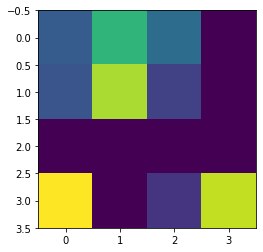

In [18]:
bottleneck_feature_example = vgg.predict(train_imgs_scaled[0:1])
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])

In [20]:
def get_bottleneck_features(model, input_imgs):
    
    features = model.predict(input_imgs, verbose=0)
    return features

In [21]:
train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (1275, 8192) 	Validation Bottleneck Features: (364, 8192)


In [22]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(x=train_features_vgg, y=train_labels_enc,
                    validation_data=(validation_features_vgg, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/50
13/13 [==============================] - 1s 36ms/step - loss: 0.6551 - accuracy: 0.6433 - val_loss: 0.5118 - val_accuracy: 0.7308
Epoch 2/50
13/13 [==============================] - 0s 9ms/step - loss: 0.3987 - accuracy: 0.8088 - val_loss: 0.3408 - val_accuracy: 0.8626
Epoch 3/50
13/13 [==============================] - 0s 10ms/step - loss: 0.2939 - accuracy: 0.8669 - val_loss: 0.3333 - val_accuracy: 0.8489
Epoch 4/50
13/13 [==============================] - 0s 9ms/step - loss: 0.2825 - accuracy: 0.8725 - val_loss: 0.3173 - val_accuracy: 0.8654
Epoch 5/50
13/13 [==============================] - 0s 17ms/step - loss: 0.2287 - accuracy: 0.9116 - val_loss: 0.3836 - val_accuracy: 0.8297
Epoch 6/50
13/13 [==============================] - 0s 9ms/step - loss: 0.2392 - accuracy: 0.9007 - val_loss: 0.3022 - val_accuracy: 0.8654
Epoch 7/50
13/13 [==============================] - 0s 9ms/step - loss: 0.2154 - accuracy: 0.9065 - val_loss: 0.3318 - val_accuracy: 0.8462
Epoch 8/50
13/13 

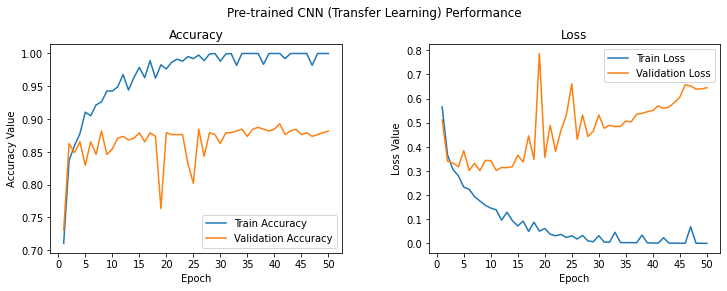

In [25]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,51))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 51, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 51, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [26]:
model.save('4-pretrained_cnn_daisy.h5')